# 최소 각도 회귀

Step		Added		Dropped		Active set size		C
0		2				1		19960.73326904347
1		8				2		18696.79800577021
2		3				3		9521.697597382761
3		6				4		6645.076417982521
4		1				5		2735.8444764866763
5		9				6		1866.5436965208605
6		4				7		1449.9107445254658
7		7				8		420.0818230083511
8		5				9		115.15727404120753
9		0				10		106.9938572283694


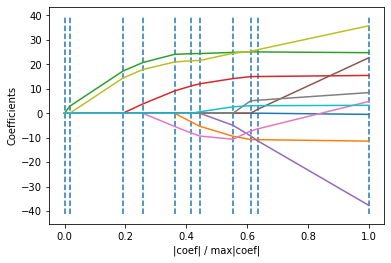

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


X, y = datasets.load_diabetes(return_X_y=True)

# Standardize data (easier to set the l1_ratio parameter)
X /= X.std(axis=0)


# Compute paths
alpha, _, coefs = linear_model.lars_path(X,y, verbose=2)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.axis('tight')
plt.show()

In [100]:
regr = linear_model.Lars()
regr.fit(X,y)
print("Coefficients are : ",regr.coef_)

Coefficients are :  [ -0.47623169 -11.40703082  24.72625713  15.42967916 -37.68035801
  22.67648701   4.80620008   8.422084    35.73471316   3.21661161]


In [101]:
print("R2 score is ", regr.score(X,y))

R2 score is  0.5177494254132934


# 베이지안 회귀

In [104]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=10, n_features=1,
                      n_informative=1, noise=3, random_state=1)

regr = linear_model.LinearRegression()
regr.fit(X,y)

test_x = 2*np.max(X)
pred_test_x = regr.predict(test_x.reshape(1,-1))
pred_test_x

array([10.79983753])

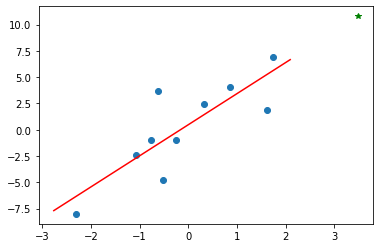

In [106]:
plt.scatter(X,y)
x_bounds = np.array([1.2*np.min(X), 1.2*np.max(X)]).reshape(-1,1)
plt.plot(x_bounds, regr.predict(x_bounds), 'r-')
plt.plot(test_x, pred_test_x, 'g*')
plt.show()

In [107]:
regr = linear_model.BayesianRidge()
regr.fit(X,y)

BayesianRidge()

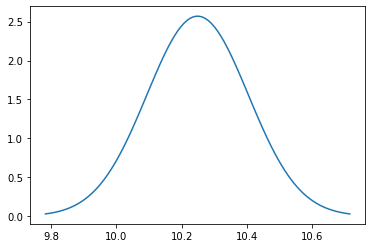

In [114]:
from scipy.stats import norm

mean = regr.predict(test_x.reshape(-1,1))
stddev = regr.alpha_
plt_x = np.linspace(mean-3*stddev, mean+3*stddev, 100)
plt.plot(plt_x, norm.pdf(plt_x, mean, stddev))
plt.show()

# 힌지 손실, SGD 분류

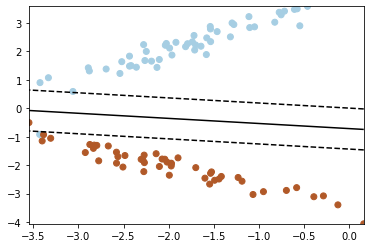

In [143]:
from sklearn.linear_model import SGDClassifier

X,y = make_classification(n_samples=100, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=2,
                           random_state=101)

clf = SGDClassifier(loss='hinge', n_iter_no_change=500,
                    random_state=101, alpha=0.001)
clf.fit(X,y)

xx = np.linspace(np.min(X[:,0]), np.max(X[:,0]),10)
yy = np.linspace(np.min(X[:,1]), np.max(X[:,1]),10)

X1, X2 = np.meshgrid(xx,yy)
Z = np.empty(X1.shape)
for (i,j), val in np.ndenumerate(X1) : 
    x1 = val
    x2 = X2[i,j]
    p = clf.decision_function([[x1,x2]])
    Z[i,j] = p[0]
levels = [-1.0, 0.0, 1.0]
linestyles = ['dashed', 'solid', 'dashed']
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
plt.show()

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X,y = make_classification(n_samples=100, n_features=20,
                           n_informative=5, n_redundant=5,
                           n_clusters_per_class=2, class_sep=1,
                           random_state=101)

X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.3, random_state=101)

clf_1 = SGDClassifier(loss='hinge', random_state=101)
clf_1.fit(X_train, y_train)

clf_2 = SGDClassifier(loss='log', random_state=101)
clf_2.fit(X_train, y_train)

print('SVD : ', accuracy_score(y_test, clf_1.predict(X_test)))
print('Log. Regression : ',accuracy_score(y_test, clf_2.predict(X_test)))

SVD :  0.8
Log. Regression :  0.7666666666666667


In [165]:
%timeit clf_1.fit(X_train, y_train)
%timeit clf_2.fit(X_train, y_train)

498 µs ± 5.26 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
576 µs ± 20.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [170]:
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import load_boston

boston = load_boston()
X = StandardScaler().fit_transform(boston['data'])
y = boston['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

regr_1 = SVR(kernel='linear')
regr_1.fit(X_train, y_train)

regr_2 = SGDRegressor(random_state=101)
regr_2.fit(X_train, y_train)

print('SVR : ', mean_absolute_error(y_test, regr_1.predict(X_test)))
print('Lin. Regression: ',mean_absolute_error(y_test,regr_2.predict(X_test)))

SVR :  3.6661222925625614
Lin. Regression:  3.8284539665834014


# 회귀 트리

In [171]:
from sklearn.tree import DecisionTreeRegressor

regr = DecisionTreeRegressor(random_state=101)
regr.fit(X_train, y_train)

mean_absolute_error(y_test, regr.predict(X_test))

3.3493421052631582

# 리그레서 앙상블

## 배깅

In [176]:
from sklearn.ensemble import BaggingRegressor
bagging = BaggingRegressor(SGDRegressor(), n_jobs=-1,
                         n_estimators=1000, random_state=101,
                         max_features=0.8)
bagging.fit(X_train, y_train)
mean_absolute_error(y_test, bagging.predict(X_test))

3.8028522954341604

In [177]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=100,n_jobs=-1,random_state=101)
regr.fit(X_train, y_train)
mean_absolute_error(y_test, regr.predict(X_test))

2.6071052631578944

In [179]:
sorted(zip(regr.feature_importances_,boston['feature_names']),key=lambda x : -x[0])

[(0.5251394785665984, 'LSTAT'),
 (0.27900306354937177, 'RM'),
 (0.054443517360464516, 'DIS'),
 (0.03329193375174695, 'CRIM'),
 (0.02996628136125841, 'NOX'),
 (0.02115216378568037, 'PTRATIO'),
 (0.016097781544041838, 'AGE'),
 (0.014792811839625532, 'TAX'),
 (0.010561142767608146, 'B'),
 (0.007854185838245625, 'INDUS'),
 (0.0054032687523295755, 'RAD'),
 (0.0012874861336010118, 'ZN'),
 (0.001006884749427925, 'CHAS')]

## 부스팅

In [180]:
from sklearn.ensemble import AdaBoostRegressor
booster = AdaBoostRegressor(SGDRegressor(), random_state=101,
                            n_estimators=100, learning_rate=0.01)
booster.fit(X_train,y_train)
mean_absolute_error(y_test,booster.predict(X_test))

3.974520394838626

In [181]:
from sklearn.ensemble import GradientBoostingRegressor
regr = GradientBoostingRegressor(n_estimators=500,
                                learning_rate=0.01,
                                random_state=101)
regr.fit(X_train,y_train)
mean_absolute_error(y_test, regr.predict(X_test))

2.6046621668252157

# 최소 각도 편차, 기울기 부스팅 리그레서

In [183]:
from sklearn.ensemble import GradientBoostingRegressor
regr = GradientBoostingRegressor('lad',
                                 n_estimators=500,
                                 learning_rate=0.1,
                                 random_state=101)
regr.fit(X_train,y_train)
mean_absolute_error(y_test, regr.predict(X_test))

2.67781448806759